## A LYRICAL EVOLUTION: 

#### An Investigation of the Cultural Lexicon of U.S. Popular Music from 1958 - Present

---

**A Time Series Analysis and Natural Language Processing Based Capstone Project Created By:**

Jerry Nolf, Rachel Robbins-Mayhill, Ben Smith,  & Chris Teceno                      


Codeup   |   Innis Cohort   |   June 2022  

<img src="dataset-cover.png">

## Project Goal
This project aimed to investigate the patterns of song lyrics across decades by applying Natural Language Processing techniques including Topic Modeling and Sentiment Analysis, while using a Kaggle data set of the Billboard Top 100 Songs from 1958 - Present and lyrics pulled from the Genius.com API. We believe the lyrics of popular songs could be used for historical analysis using exploratory methods and hypothesis testing to identify changing societal trends in relationships, technology, sexuality, and vulgarity. Furthermore, we beleive we can predict the decade the song appeared on the Top 100 using features and machine learning methods.

## Project Description

Songs are powerful tokens: they can soothe, validate, ignite, confront, and educate us – among other things. Like time capsules, they are captured for eternity. The slang and language used are often indicative of the times, and you can probably recall exactly when a song was made based on what is mentioned. Arguably, music is a catalyst for societal and cultural evolution like no other art form. It has been causing controversy and societal upheaval for decades, and it seems with every generation there’s a new musical trend that has the older generations shaking their heads. 

For centuries, songs have been passed down through generations, being sung as oral histories. However, with advancements of the 20th century, technology has made the world of music a much smaller place and, thanks to cheap, widely-available audio equipment, songs are now distributed on a much larger scale, having a farther-reaching impact, and a more permanent place in history. 

This project aimed to combine the record of lyrical history and technological advancements to evaluate the changes in the societal lexicon over the last 60+ years. Using machine learning and natural language processing methodologies we investigated the topics prevalent in songs of the past, predicted the decade in which they were written, and conducted historical analysis through exploration to identify changing societal trends in relationships, sexuality, and vulgarity.

<img src='Billboard.png' width="350" height="350" align="left"/> To do this, we acquired a [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs) data set of the Billboard Top 100 Songs from its inception in 1958 to present. We then utilized the [Genius.com](https://genius.com/) API and LyricGenius Library to conduct web scraping to pull the lyrics for the specified songs which became the corpus for this project. After acquiring and preparing the corpus, our team conducted time series analysis and natural language processing exploration utilizing methods such as sentiment analysis and topic modeling. We also employed multiclass classification methods to create multiple machine learning models. The end goal was to create an NLP model that accurately predicted the decade a song first appeared on the Billboard Top 100 chart, based on the words and word combinations found in the lyrics of the song.

We choose the Billboard Hot 100 song list as a focus because it is the music industry standard record chart in the United States for song popularity, published weekly by Billboard magazine. It provides a window into popular culture at a given time, by providing chart rankings of songs that were trending on sales, airplay, and now streaming for that week in the United States. It is arguably the best historical record of the impact of specific popular songs over time.

## Initial Thoughts & Hypothesis

The initial hypothesis of this project was that we could use the top songs of each decade in conjunction with topic modeling to identify lyric features that would accurately predict the decade a song was on the Billboard Top 100 using machine learning. The thought behind this was that popular songs have been the historians of a unique lexicon, specific to their place in time. We believe the lyrics of popular songs could be analyzed through machine learning to identify societal trends in relationships, sexuality, and vulgarity.

## Initial Questions

The focus of this project is on identifying the decade a song first appeared on the Billboard Top 100. Below are some of the initial questions this project looked to answer throughout the Data Science Pipeline.
 
##### Data-Focused Questions
- How does sentiment change over time?
- Is there a correlation between historical events and sentiment?
- What topics are most prevalent across the decades?
- How do topics change over time?

## Key Findings

Through exploratory analysis, we discovered US popular music has undergone a major cultural shift starting in the 90's, where: 

- overall sentiment decreased 
- lyrics became more complex 
- topics shifted towards sex, money, & violence 
- ‘love’ was replaced with ‘like’

Ultimately, our hypothesis that we could use the top songs of each decade to accurately predict the decade a song was on the Billboard Top 100 was true. Although, certain decades were predicted more accurately than others. Our best performing models were based heavily on TF/IDF with the top performing model being a Logistic Regression model performing 220% over baseline.

The key findings for this presentation are available in slide format by clicking on the [Final Slide Presentation](https://www.canva.com/design/DAFCXoeG7z0/jNCtQkQFqyOTWS5Ckg8Xuw/view?utm_content=DAFCXoeG7z0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).

==========================================================================================================================================================

## I. ACQUIRE
To acquire the data for this project, we utilized a [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs) data set of the Billboard Top 100 Songs from its inception in 1958 to present. 

The dataset provided:
- date song was on the Billboard Top 100 
- rank of song  
- title
- artist name
- rank of song the previous week
- rank of song at it's peak week
- number of weeks song was on the Top 100  

We selected only unique artists and songs, to ensure there were no duplicates, keeping only the earliest appearance on the chart to standardize the selections in the event of multiple appearances. Following song selection with the Kaggle dataset, we then obtained an API token to utilize the [Genius.com](https://genius.com/) API and [LyricGenius Library](https://pypi.org/project/lyricsgenius/) to conduct web scraping to pull the lyrics for the specified songs which became the corpus for this project.

### Note about imports: 
Imports for this project are added in the sections in which they are required.

In [1]:
# import for acquisition
import os
import json
import requests
import final_acquire as acquire
import final_prepare as prepare
import final_explore as explore
import final_model as model


# import for data manipulation
import pandas as pd
import numpy as np
from typing import Dict, List, Optional, Union, cast

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire data from .json saved and processed using functions found in wrangle.py
df = pd.read_csv("songs_0526.csv")
df.head()

,Unnamed: 0,title,artist,date,lyrics
0,2,#1,Nelly,2001-10-20,#1 LyricsUh uh uh I just gotta bring it to the...
1,4,#9 Dream,John Lennon,1974-12-21,#9 Dream Lyrics[Verse 1] So long ago Was it in...
2,5,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,..."
3,6,#SELFIE,The Chainsmokers,2014-03-15,#SELFIE Lyrics[Verse 1] When Jason was at the ...
4,7,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...


In [3]:
# obtain number of columns and rows for original dataframe
df.shape

(23762, 5)

### The Original DataFrame Size: ____ rows, or documents, and ____ columns.

==========================================================================================================================================================

## II. PREPARE

After data acquisition, the dataframe was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the ______ function saved within the prepare.py file inside the [Lyrical Evolution](https://github.com/CBRJ-Lyrical-Metrics/song-lyrics-capstone) repository on GitHub. The function takes in the original corpus dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Basic Cleaning: 
    - Make all text lowercase
    - Normalize, encode, and decode to remove accented text and special characters
    - Tokenize strings to break words and punctuation into discrete units
    - Lemmatize words to acquire base words
    - Remove stopwords
    - Rename columns
    
___
 
- Address missing values, data errors, unnecessary data, and unclear values:
    - 
    - Drop missing values to prevent impediments in exploration and modeling: ______ documents/observations that had null values in the ______ column 
    - Drop all rows where ________
    - Total dropped documents = _______
---    
- Create feature engineered columns:
    - unique words
    - character count
    - word count
    - unique word count
    - most common word count (2nd, 3rd, 4th, 5th most common)
    - unique bigram count
    - count of bigrams unique to each language in train set(this is done by creating a new column for each language)
    
---
- Split corpus into train, validate, and test samples

**Note on Missing Value Handling:**
The missing value removal equated to removing 9 observations/documents, which was about 9\% of the data set. It still left a substantial number of observations above the minimum expectation of 100. If given more time with the data, it is recommended to investigate other ways to impute the missing data.

---

## Results of Data Preparation

In [4]:
# import for prepare
import final_prepare as prepare
import unicodedata
import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from time import strftime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter

In [5]:
# apply the data preparation observations and tasks to clean the data using the prep_data function found in the prepare.py
df = prepare.get_data()
# view first few rows of dataframe
# obtain the number of rows and columns for the updated/cleaned dataframe 
print(df.shape)
df.head()

Reading from csv...
(23762, 23)


,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
0,#1,Nelly,2001-10-20,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,coupe nigga cricket resident shake roof show l...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.000000,0,0,0,3,"[('uh', 'uh'), ('uh', 'uh'), ('uh', 'got'), ('...","[('uh', 'uh', 'uh'), ('uh', 'uh', 'got'), ('uh...",sex
1,#9 Dream,John Lennon,1974-12-21,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,river air ago around whispered took dance call...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.000000,2,1,0,0,"[('long', 'ago'), ('ago', 'dream'), ('dream', ...","[('long', 'ago', 'dream'), ('ago', 'dream', 'd...",love
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,ah ah beautiful ah ah beautiful hop back bike ...,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...",2010,768,129,bike skin stop dance always moonlight middle r...,54,0.9989,very positive,[intro: mariah carey] [verse 1: miguel] [choru...,2,2,1.000000,0,1,0,0,"[('ah', 'ah'), ('ah', 'beautiful'), ('beautifu...","[('ah', 'ah', 'beautiful'), ('ah', 'beautiful'...",lost
3,#SELFIE,The Chainsmokers,2014-03-15,jason table kept seeing look girl think make j...,#SELFIE Lyrics[Verse 1] When Jason was at the ...,2010,954,172,bathroom bought never vodka dj one model u sum...,100,0.9218,very positive,[verse 1] [drop 1] [verse 2] [drop 2] [verse 3...,0,3,0.000000,0,0,0,0,"[('jason', 'table'), ('table', 'kept'), ('kept...","[('jason', 'table', 'kept'), ('table', 'kept',...",violence
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,oh alive alive alive oh fly fly fly oh alive a...,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...,2010,1238,208,hater muscle piggy fly told one used stronger ...,77,0.9984,very positive,[instrumental break] [pre-chorus: justin biebe...,3,2,0.666667,3,1,1,0,"[('oh', 'alive'), ('alive', 'alive'), ('alive'...","[('oh', 'alive', 'alive'), ('alive', 'alive', ...",sex


## Prepared DataFrame Size: 134 rows, or documents, and 13 columns.

---

### PREPARE - SPLIT

In [6]:
# import for split
from sklearn.model_selection import train_test_split

After preparing the corpus, it was split into 3 samples; train, validate, and test using:

- Random State: ______
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the prepare.py file inside the [_____](_________) repository on GitHub.

In [7]:
# split the data into train, validate, and test using the split_data function found in the prepare.py
train, validate, test = prepare.split_data(df)
# obtain the number of rows and columns for the splits
train.shape, validate.shape, test.shape

((13306, 23), (5703, 23), (4753, 23))

==========================================================================================================================================================

## III. EXPLORE

In [8]:
# import for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import style
from wordcloud import WordCloud
import final_explore as explore

After acquiring and preparing the corpus, exploration was conducted. All univariate exploration was completed on the entire cleaned corpus in the workbook for this project. For the purpose of the final report, only the target variable will be displayed in order to reduce noise and provide focused context for the project. Following univariate exploration, the split sets (train, validate, and test samples) were utilized thorugh modeling, where only the train set was used for bivariate and multivariate exploration to prevent data leakage.

---

### UNIVARIATE EXPLORATION

In [9]:
# Keep??????

#### UNIVARIATE EXPLORATION of TARGET VARIABLE

#### OBSERVATIONS: 
- 

---

### EXPLORATION QUESTIONS

All bivariate exploration was conducted on the train corpus to prevent data leakage. The initial questions and univariate exploration guided the bivariate exploration.

#### EXPLORE QUESTIONS

#### QUESTION 1: 
How has song sentiment changed over time?


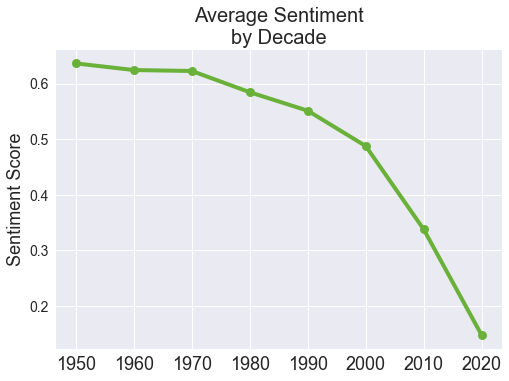

In [10]:
explore.sentiment_lineplot(df)

In [11]:
# Hypothesis Testing - Mann-Whitney

#### ANSWER 1:
Sentiment was fairly steady in the 60's and 70's, followed by a gradual downward trend which becomes sharper in the 2000's and 2010's. The downward trend is due to an increase in very negative sentiment and decrease in very positivesentiment while mid-range sentiment stays contstant.

#### Question 2:
What topics are most prevalent across the decades?


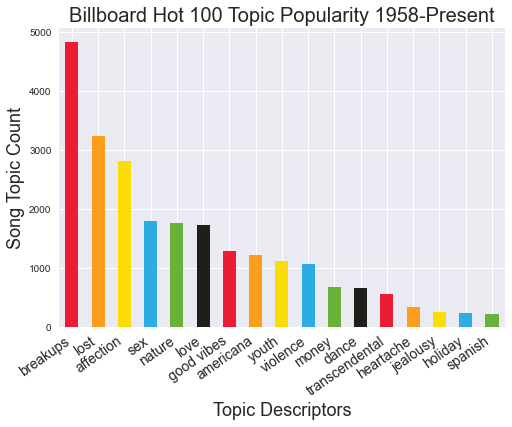

In [12]:
explore.topic_popularity(df)

#### Answer 2:
Breakups are by far the most popular topics in songs across all decades, followed by being or feeling lost, then affection, sex, and nature.

#### QUESTION 3: 
- How do relationship topics change over the decades?

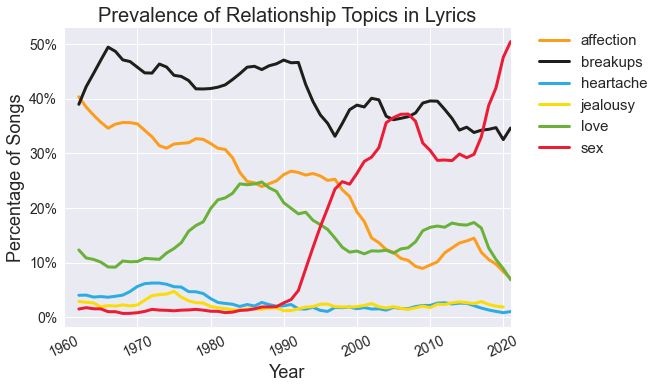

In [13]:
explore.relationship_line(df)

Observation:
There appears to be an inverse relationship between affection and sex, with the topic of affection decreaseing in prevalence over time, and the topic of sex increasing in usage.

In [14]:
### Hyptohesis Testing - Correlation or Kruskal-Wallis?

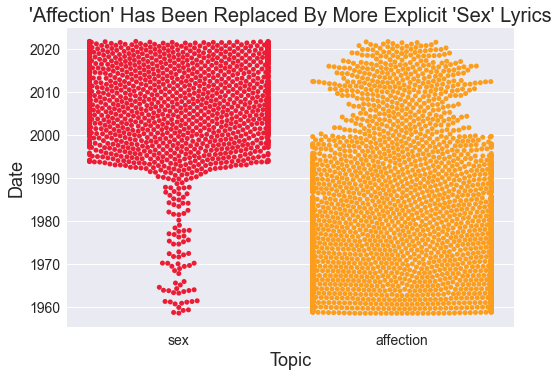

In [15]:
explore.touch_swarm(df)

#### Answer 3:
While most relationship topics appear constant, affection and sex have an inverse relationship.

#### QUESTION 4: 
- How do vice topics change over the decades?

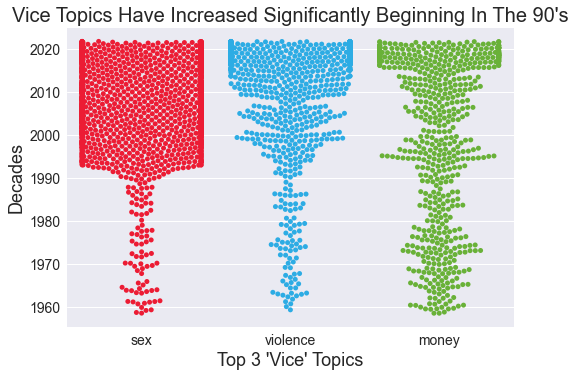

In [16]:
explore.vice_swarm(df)

In [17]:
#### Hypothesis Testing - 

#### ANSWER 4: 
After 1990 sex became extremely popular in lyrics, then around 2015 violence and money exploded as well.

#### Question 5:
How has the prevalence of the word 'like' changed over the decades?

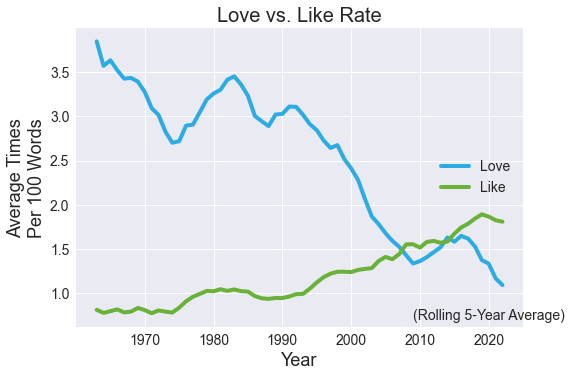

In [18]:
explore.love_vs_like_lineplot(df)

In [19]:
# Hypothesis Testing - 

#### ANSWER 5: 
Love went from most common word in the early decades, to lower in the top 5, then out of the top 5 and replaced with like.

==========================================================================================================================================================

## IV. MODEL

==========================================================================================================================================================

## V. CONCLUSION

==========================================================================================================================================================